In [9]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
######----train------#####
iter_train_interval = 100
statistic_train_interval = 1
start_plot_idx = 0

train_acc_file = open('trainacc.refine', 'r')
train_acc_total = train_acc_file.readlines()
train_acc_num = len(train_acc_total)
# train_acc_res use to store acc value 
train_acc_res = np.zeros(train_acc_num)
train_acc_idx = np.arange(train_acc_num) * iter_train_interval
print(train_acc_num)

20


In [11]:
######-----test------#####
iter_test_interval = 500
statistic_test_interval = 1

test_acc_file = open('testacc.refine', 'r')
test_acc_total = test_acc_file.readlines()
test_acc_num = len(test_acc_total)
test_acc_res = np.zeros(test_acc_num)
test_acc_idx = np.arange(test_acc_num) * iter_test_interval
print(test_acc_num)

5


In [12]:
######----train------#####
for idx in range(train_acc_num) :
    train_acc_str = train_acc_total[idx]
    str_start_idx = train_acc_str.find('=') + 1
    str_end_idx = len(train_acc_str) - 1
    train_acc_res[idx] = float(train_acc_str[str_start_idx:str_end_idx])

In [13]:
######----test------#####
for idx in range(test_acc_num) :
    test_acc_str = test_acc_total[idx]
    str_start_idx_test = test_acc_str.find('=') + 1
    str_end_idx = len(test_acc_str) - 1
    test_acc_res[idx] = float(test_acc_str[str_start_idx:str_end_idx])

In [14]:
######----train------#####
statistic_len = int((train_acc_num + statistic_train_interval - 1)/statistic_train_interval)
statistic_idx = np.arange(statistic_len) * iter_train_interval * statistic_train_interval
statistic_res_mean = np.zeros(statistic_len)
statistic_res_var = np.zeros(statistic_len)

print(statistic_len)

20


In [22]:
######----test------#####
statistic_len_test = int((test_acc_num + statistic_test_interval - 1)/statistic_test_interval)
statistic_idx_test = np.arange(statistic_len_test) * iter_test_interval * statistic_test_interval
statistic_res_mean_test = np.zeros(statistic_len_test)
statistic_res_var_test = np.zeros(statistic_len_test)

print(statistic_len_test)

5


In [23]:
######----train------#####
for idx in range(statistic_len) :
    train_acc_start_idx = idx*statistic_train_interval
    train_acc_end_idx = min(train_acc_start_idx + statistic_train_interval, train_acc_num)
    train_acc_part = train_acc_res[train_acc_start_idx : train_acc_end_idx]
    statistic_res_mean[idx] = np.mean(train_acc_part)
    statistic_res_var[idx] = np.var(train_acc_part)

In [24]:
######----test------#####
for idx in range(statistic_len_test) :
    test_acc_start_idx = idx*statistic_train_interval
    test_acc_end_idx = min(train_acc_start_idx + statistic_train_interval, train_acc_num)
    test_acc_part = test_acc_res[test_acc_start_idx : test_acc_end_idx]
    statistic_res_mean_test[idx] = np.mean(test_acc_part)
    statistic_res_var_test[idx] = np.var(test_acc_part)

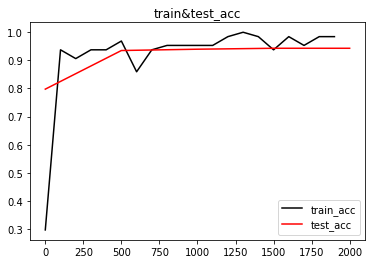

In [28]:
plt.plot(statistic_idx[start_plot_idx:], statistic_res_mean[start_plot_idx:],'k-',label="train_acc")
plt.plot(statistic_idx_test[start_plot_idx:], statistic_res_mean_test[start_plot_idx:],'r-',label="test_acc")
plt.title('train&test_acc')
plt.savefig('loss.png')
plt.legend()
plt.show()